## Installing Packages

\\:turtle: TAB gives you a turtle!


In [1]:
#  ] add ...

## Inspecting objects

In [2]:
x = 5

5

In [3]:
typeof(x)

Int64

In [4]:
a = [1 2; 3 4; 5 6]

3×2 Array{Int64,2}:
 1  2
 3  4
 5  6

In [5]:
size(a)

(3, 2)

In [6]:
length(a)

6

## Slicing

In [7]:
a[1:2 ,1]

2-element Array{Int64,1}:
 1
 3

In [8]:
a[1:end]

6-element Array{Int64,1}:
 1
 3
 5
 2
 4
 6

In [9]:
greet = "Hello"
whom = "World"

"World"

In [10]:
"$greet, $whom, $(1+1)!"

"Hello, World, 2!"

## parse and eval

In [11]:
Meta.parse("1+2")

:(1 + 2)

# is in, \in, \notin

In [12]:
'a' ∈ "banana"

true

In [13]:
'e' ∉ "banana"

true

In [14]:
@show a  # useful to print stuff debuggin

a = [1 2; 3 4; 5 6]


3×2 Array{Int64,2}:
 1  2
 3  4
 5  6

## Object equivalence

\equiv TAB or ===

In [15]:
a = "banana"
b = "banana"

"banana"

In [16]:
a === b

true

In [17]:
x, y = (1, 1)

(1, 1)

In [18]:
x === y

true

In [19]:
@show x y

x = 1
y = 1


1

In [20]:
known = Dict(0=>0, 1=>1)
"""
This is a doc string. It shows up when you do `?fibonacci`
"""
function fibonacci(n)
    if n ∈ keys(known)
        return known[n]
    end
    res = fibonacci(n-1) + fibonacci(n-2)
    known[n] = res
    res
end

fibonacci

In [21]:
?fibonacci

search: fibonacci



This is a doc string. It shows up when you do `?fibonacci`


In [22]:
['a', 1]

2-element Array{Any,1}:
  'a'
 1   

In [23]:
s = "abc"
t = [1, 2, 3]
for pair in zip(s, t)
    println(pair)
end

('a', 1)
('b', 2)
('c', 3)


In [24]:
collect(zip("Anne", "Elf"))

3-element Array{Tuple{Char,Char},1}:
 ('A', 'E')
 ('n', 'l')
 ('n', 'f')

In [25]:
for (index, element) in enumerate("abc")
    println(index, " ", element)
end

1 a
2 b
3 c


## structs

structs are immutable by default

In [26]:
struct Point
    x
    y
end

In [27]:
p = Point(3.0, 4.0);

In [28]:
p.x

3.0

In [29]:
mutable struct MPoint
    x
    y
end

struct Rectangle
    width
    height
    corner
end

origin = MPoint(0., 0.)

box = Rectangle(100., 200., origin)
@show box

box.corner.x = 100
@show box

box = Rectangle(100.0, 200.0, MPoint(0.0, 0.0))
box = Rectangle(100.0, 200.0, MPoint(100, 0.0))


Rectangle(100.0, 200.0, MPoint(100, 0.0))

In [30]:
fieldnames(Rectangle)
isdefined(p, :x)

true

In [31]:
struct MyTime
    hour :: Int64
    minute :: Int64
    second :: Int64
    function MyTime(hour::Int64=0, minute::Int64=0, second::Int64=0)
        @assert(0 ≤ minute < 60, "Minute is not between 0 and 60.")
        @assert(0 ≤ second < 60, "Second is not between 0 and 60.")
        new(hour, minute, second)
    end
end

In [32]:
# Not a complete example, but showing
# inheritance, overloading Base functiomn with your type,
# operator overloading

import Base.<

const suit_names = ["♣", "♦", "♥", "♠"]
const rank_names = ["A", "2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K"]


struct Card
    suit :: Int64
    rank :: Int64
    function Card(suit::Int64, rank::Int64)
        @assert(1 ≤ suit ≤ 4, "suit is not between 1 and 4")
        @assert(1 ≤ rank ≤ 13, "rank is not between 1 and 13")
        new(suit, rank)
    end
end

function <(c1::Card, c2::Card)
    (c1.suit, c1.rank) < (c2.suit, c2.rank)
end


abstract type CardSet end   # Parent type

struct Deck <: CardSet      # The "<:" means CardSet is the parent
    cards :: Array{Card, 1}
end

struct Hand <: CardSet
    cards :: Array{Card, 1}
    label :: String
end

function Base.show(io::IO, cs::CardSet)    # Now we control multiple dispatch with the parent
    for card in cs.cards
        print(io, card, " ")
    end
end


## functors

Any arbitrary Julia object can be made “callable”. Such “callable” objects are sometimes called functors.

In [33]:
struct Polynomial{R}
    coeff::Vector{R}
end

function (p::Polynomial)(x)
    val = p.coeff[end]
    for coeff in p.coeff[end-1:-1:1]
        val = val * x + coeff
    end
    val
end

In [34]:
ENV["HOME"]

"/home/jovyan"

In [35]:
ENV["JULIA_DEBUG"]="all"

"all"

In [36]:
@warn "This is a warning"

┌ Warning: This is a warning
└ @ Main In[36]:1


In [37]:
ENV["JULIA_DEBUG"]="error"

"error"

In [38]:
@warn "This is a warning"

┌ Warning: This is a warning
└ @ Main In[38]:1


In [39]:
struct MyStruct{T<:Real}
    x::T
    y::T
end

In [40]:
struct AlsoMyStruct
    x::Real
    y::Real
end

In [41]:
using InteractiveUtils

In [42]:
@code_lowered fibonacci(4)

CodeInfo(
1 ─       Core.NewvarNode(:(res))
│   %2  = Main.keys(Main.known)
│   %3  = n ∈ %2
└──       goto #3 if not %3
2 ─ %5  = Base.getindex(Main.known, n)
└──       return %5
3 ─ %7  = n - 1
│   %8  = Main.fibonacci(%7)
│   %9  = n - 2
│   %10 = Main.fibonacci(%9)
│         res = %8 + %10
│         Base.setindex!(Main.known, res, n)
└──       return res
)

In [43]:
@code_typed fibonacci(4)

CodeInfo(
1 ─ %1  = Main.keys(Main.known)::Any
│   %2  = (n ∈ %1)::Any
└──       goto #3 if not %2
2 ─ %4  = Base.getindex(Main.known, n)::Any
└──       return %4
3 ─ %6  = Base.sub_int(n, 1)::Int64
│   %7  = invoke Main.fibonacci(%6::Int64)::Any
│   %8  = Base.sub_int(n, 2)::Int64
│   %9  = invoke Main.fibonacci(%8::Int64)::Any
│   %10 = (%7 + %9)::Any
│         Base.setindex!(Main.known, %10, n)::Any
└──       return %10
) => Any

In [44]:
@code_llvm fibonacci(4)


;  @ In[20]:6 within `fibonacci'
define nonnull %jl_value_t addrspace(10)* @julia_fibonacci_17116.1(i64) {
top:
  %1 = alloca %jl_value_t addrspace(10)*, i32 4
  %gcframe = alloca %jl_value_t addrspace(10)*, i32 5
  %2 = bitcast %jl_value_t addrspace(10)** %gcframe to i8*
  call void @llvm.memset.p0i8.i32(i8* %2, i8 0, i32 40, i32 0, i1 false)
  %thread_ptr = call i8* asm "movq %fs:0, $0", "=r"()
  %ptls_i8 = getelementptr i8, i8* %thread_ptr, i64 -15560
  %ptls = bitcast i8* %ptls_i8 to %jl_value_t***
  %3 = getelementptr %jl_value_t addrspace(10)*, %jl_value_t addrspace(10)** %gcframe, i32 0
  %4 = bitcast %jl_value_t addrspace(10)** %3 to i64*
  store i64 6, i64* %4
  %5 = getelementptr %jl_value_t**, %jl_value_t*** %ptls, i32 0
  %6 = getelementptr %jl_value_t addrspace(10)*, %jl_value_t addrspace(10)** %gcframe, i32 1
  %7 = bitcast %jl_value_t addrspace(10)** %6 to %jl_value_t***
  %8 = load %jl_value_t**, %jl_value_t*** %5
  store %jl_value_t** %8, %jl_value_t*** %7
  %9 = bitc

In [45]:
@code_native fibonacci(4)

	.text
; ┌ @ In[20]:6 within `fibonacci'
	pushq	%rbp
	movq	%rsp, %rbp
	pushq	%r15
	pushq	%r14
	pushq	%r13
	pushq	%r12
	pushq	%rbx
	andq	$-32, %rsp
	subq	$96, %rsp
	movq	%rdi, %r14
	vxorps	%xmm0, %xmm0, %xmm0
	vmovaps	%ymm0, 32(%rsp)
	movq	$0, 64(%rsp)
	movq	%fs:0, %r12
	movq	$6, 32(%rsp)
	movq	-15560(%r12), %rax
	movq	%rax, 40(%rsp)
	movabsq	$140179567608552, %rcx  # imm = 0x7F7E195502E8
	leaq	32(%rsp), %rax
	movq	%rax, -15560(%r12)
	movq	(%rcx), %rax
	movq	%rax, 48(%rsp)
	movabsq	$jl_system_image_data, %rcx
	movq	%rcx, (%rsp)
	movq	%rax, 8(%rsp)
	movabsq	$jl_apply_generic, %r13
	movq	%rsp, %r15
	movl	$2, %esi
	movq	%r15, %rdi
	vzeroupper
	callq	*%r13
	movq	%rax, %rbx
	movq	%rbx, 48(%rsp)
	movabsq	$jl_box_int64, %rax
	movq	%r14, %rdi
	callq	*%rax
	movq	%rax, 56(%rsp)
	movabsq	$jl_system_image_data, %rcx
	movq	%rcx, (%rsp)
	movq	%rax, 8(%rsp)
	movq	%rbx, 16(%rsp)
	movl	$3, %esi
	movq	%r15, %rdi
	callq	*%r13
	movq	-8(%rax), %rcx
	shrq	$4, %rcx
	movabsq	$8761220758711, %rdx    # imm = 0x7

## Importing Packages

In [46]:
using Flux, Plots

ArgumentError: ArgumentError: Package Flux not found in current path:
- Run `import Pkg; Pkg.add("Flux")` to install the Flux package.


## Getting Version Numbers

In [47]:
VERSION

v"1.2.0"

In [48]:
Pkg.installed()

UndefVarError: UndefVarError: Pkg not defined

## Getting Help

In [49]:
?σ

"σ" can be typed by \sigma<tab>

search:

Couldn't find σ
Perhaps you meant <, a, b, p, s, t, x, y, !, %, &, *, +, -, /, :, >, \, ^ or |


No documentation found.

Binding `σ` does not exist.


## Plots API

In [50]:
plot(σ, -5, 5, label="\\sigma", xlabel="x", ylabel="\\sigma\\(x\\)")

UndefVarError: UndefVarError: plot not defined

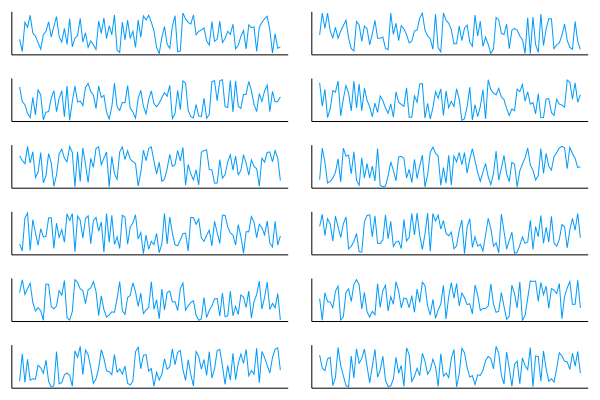

In [179]:
plot(rand(100,12), layout=(6,2), legend=false, ticks=false)

In [191]:
x = 0:10:100
y = x/2
plot(x, y, (x, y) -> sin(x)+cos(y), nlevels=10, fill=true)

MethodError: MethodError: no method matching iterate(::Surface{Array{Float64,2}})
Closest candidates are:
  iterate(!Matched::Core.SimpleVector) at essentials.jl:604
  iterate(!Matched::Core.SimpleVector, !Matched::Any) at essentials.jl:604
  iterate(!Matched::ExponentialBackOff) at error.jl:214
  ...

In [184]:
?contour

search: contour contourf contour! contourf! contour3d contour3d! count_ones



```
contour(x,y,z)
contour!(x,y,z)
```

Draw contour lines of the `Surface` z.

# Arguments

  * `levels`: Contour levels (if `AbstractVector`) or number of levels (if `Integer`)
  * `fill`: Bool. Fill area between contours or draw contours only (false by default)

# Example

```julia-repl
julia> x = y = range(-20, 20, length = 100)
julia> contour(x, y, (x, y) -> x^2 + y^2)
```


In [8]:
model = Dense(2, 1, σ)

Dense(2, 1, σ)

In [9]:
model.W

1×2 Array{Float32,2}:
 0.98265  -1.20867

In [10]:
model.b

1-element Array{Float32,1}:
 0.0

In [11]:
typeof(model.W)

Array{Float32,2}

In [12]:
x = rand(2)
model(x)

1-element Array{Float32,1}:
 0.64563525

In [13]:
σ.(model.W*x + model.b)

1-element Array{Float64,1}:
 0.6456351999405945

In [14]:
methods(Flux.mse)

# 1 method for generic function "mse":
[1] mse(ŷ, y) in Flux at /opt/julia/packages/Flux/oX9Pi/src/layers/stateless.jl:6

In [21]:
size(model.W)

(1, 2)

In [36]:
?Flux.SGD

No documentation found.

Binding `Flux.SGD` does not exist.


In [38]:
?Flux.train!

```
train!(loss, params, data, opt; cb)
```

For each datapoint `d` in `data` computes the gradient of `loss(d...)` through backpropagation and calls the optimizer `opt`.

Takes a callback as keyword argument `cb`. For example, this will print "training" every 10 seconds:

```julia
Flux.train!(loss, params, data, opt,
            cb = throttle(() -> println("training"), 10))
```

The callback can call `Flux.stop()` to interrupt the training loop.

Multiple optimisers and callbacks can be passed to `opt` and `cb` as arrays.
